<a href="https://colab.research.google.com/github/Armin-Abdollahi/Convolution-Neural-Network/blob/main/Convolution_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the Necessary Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:
# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
# Define the model
model = keras.Sequential(
    [
        layers.Conv2D(128, (3, 3), activation="sigmoid"),
        layers.MaxPooling2D(pool_size=(2, 2)),


        layers.Conv2D(64, (3, 3), activation="sigmoid"),
        layers.MaxPooling2D(pool_size=(2, 2)),


        layers.Conv2D(32, (3, 3), activation="sigmoid"),
        layers.MaxPooling2D(pool_size=(2, 2)),


        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
# Train the model
history = model.fit(x_train, y_train,validation_split = 0.1, epochs=50, batch_size=4, validation_data=(x_test, y_test))

Epoch 1/50
12500/12500 [==============================] - 54s 4ms/step - loss: 1.9278 - accuracy: 0.2844 - val_loss: 1.6278 - val_accuracy: 0.4112
Epoch 2/50
12500/12500 [==============================] - 51s 4ms/step - loss: 1.5139 - accuracy: 0.4523 - val_loss: 1.5244 - val_accuracy: 0.4547
Epoch 3/50
12500/12500 [==============================] - 51s 4ms/step - loss: 1.3943 - accuracy: 0.5005 - val_loss: 1.3846 - val_accuracy: 0.5019
Epoch 4/50
12500/12500 [==============================] - 51s 4ms/step - loss: 1.3087 - accuracy: 0.5279 - val_loss: 1.2969 - val_accuracy: 0.5403
Epoch 5/50
12500/12500 [==============================] - 51s 4ms/step - loss: 1.2338 - accuracy: 0.5595 - val_loss: 1.2821 - val_accuracy: 0.5386
Epoch 6/50
12500/12500 [==============================] - 52s 4ms/step - loss: 1.1668 - accuracy: 0.5854 - val_loss: 1.1849 - val_accuracy: 0.5757
Epoch 7/50
12500/12500 [==============================] - 52s 4ms/step - loss: 1.1131 - accuracy: 0.6060 - val_loss: 1

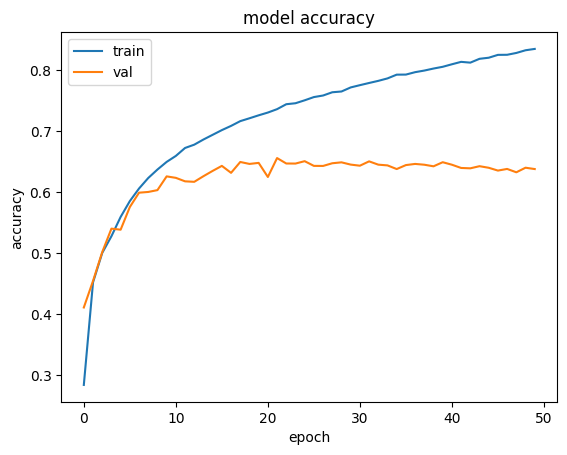

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()